# Crime Pattern Analysis - Exploratory Data Analysis

This notebook contains exploratory data analysis for crime patterns.

In [2]:
import sys
import os
from pathlib import Path

# Navigate to project root (one level up from notebooks/)
os.chdir('..')

print(f"Current working directory: {os.getcwd()}")
print(f"Utils exists: {Path('utils').exists()}")
print(f"Data exists: {Path('data/raw/core_crime').exists()}")


Current working directory: d:\projectsFX\Crime Pattern Analysis and Trend Forecasting System Using Public Data
Utils exists: True
Data exists: True


In [3]:
from utils.preprocessing import load_core_ipc_datasets

core_path = "data/raw/core_crime"
core_data = load_core_ipc_datasets(core_path)

for key, df in core_data.items():
    print(f"\n=== DATASET: {key} ===")
    print("Shape:", df.shape)
    print("Columns:")
    print(df.columns.tolist())



=== DATASET: 2001_2012 ===
Shape: (9017, 33)
Columns:
['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']

=== DATASET: 2013 ===
Shape: (823, 33)
Columns:
['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUC

In [4]:
import pandas as pd
import importlib
import utils.preprocessing
importlib.reload(utils.preprocessing)

from utils.preprocessing import (
    load_core_ipc_datasets,
    standardize_ipc_2001_2013,
    standardize_ipc_2014,
    enforce_canonical_schema
)

core = load_core_ipc_datasets("data/raw/core_crime")

df = pd.concat([
    standardize_ipc_2001_2013(core["2001_2012"]),
    standardize_ipc_2001_2013(core["2013"]),
    standardize_ipc_2014(core["2014"]),
], ignore_index=True)

core_ipc = enforce_canonical_schema(df)

core_ipc.shape, core_ipc.columns.tolist()


((10678, 23),
 ['state_ut',
  'district',
  'year',
  'murder',
  'attempt_to_murder',
  'culpable_homicide',
  'rape',
  'kidnapping_abduction',
  'dacoity',
  'robbery',
  'riots',
  'hurt_grievous_hurt',
  'dowry_deaths',
  'burglary',
  'theft',
  'auto_theft',
  'assault_on_women',
  'insult_to_modesty_of_women',
  'cruelty_by_husband_or_relatives',
  'importation_of_girls',
  'causing_death_by_negligence',
  'other_ipc_crimes',
  'total_ipc_crimes'])

In [5]:
from utils.preprocessing import normalize_columns
import pandas as pd

women_2001_2012 = pd.read_csv("data/raw/women_crime/42_district_wise_crimes_committed_against_women_2001_2012.csv")
women_2013 = pd.read_csv("data/raw/women_crime/42_district_wise_crimes_committed_against_women_2013.csv")
women_2014 = pd.read_csv("data/raw/women_crime/42_district_wise_crimes_committed_against_women_2014.csv")

for name, df in {
    "2001_2012": women_2001_2012,
    "2013": women_2013,
    "2014": women_2014
}.items():
    df = normalize_columns(df)
    print(f"\n=== WOMEN DATASET {name} ===")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())



=== WOMEN DATASET 2001_2012 ===
Shape: (9017, 10)
Columns: ['state_ut', 'district', 'year', 'rape', 'kidnapping_and_abduction', 'dowry_deaths', 'assault_on_women_with_intent_to_outrage_her_modesty', 'insult_to_modesty_of_women', 'cruelty_by_husband_or_his_relatives', 'importation_of_girls']

=== WOMEN DATASET 2013 ===
Shape: (823, 10)
Columns: ['state_ut', 'district', 'year', 'rape', 'kidnapping_and_abduction', 'dowry_deaths', 'assault_on_women_with_intent_to_outrage_her_modesty', 'insult_to_modesty_of_women', 'cruelty_by_husband_or_his_relatives', 'importation_of_girls']

=== WOMEN DATASET 2014 ===
Shape: (837, 62)
Columns: ['states_uts', 'district', 'year', 'rape', 'custodial_rape', 'custodial_gang_rape', 'custodial_other_rape', 'rape_other_than_custodial', 'rape_gang_rape', 'rape_others', 'attempt_to_commit_rape', 'kidnapping_and_abduction_total', 'kidnaping_and_abduction', 'kidnaping_and_abduction_in_order_to_murder', 'kidnapping_for_ransom', 'kidnapping_and_abduction_of_women_to_

In [6]:
import importlib
importlib.reload(utils.preprocessing)

from utils.preprocessing import (
    standardize_women_crime_2001_2013,
    standardize_women_crime_2014
)

w2001_2012 = standardize_women_crime_2001_2013(women_2001_2012)
w2013 = standardize_women_crime_2001_2013(women_2013)
w2014 = standardize_women_crime_2014(women_2014)

women_crime = pd.concat([w2001_2012, w2013, w2014], ignore_index=True)

women_crime.shape, women_crime.columns.tolist()


((10677, 10),
 ['state_ut',
  'district',
  'year',
  'rape',
  'kidnapping_abduction',
  'dowry_deaths',
  'assault_on_women',
  'insult_to_modesty_of_women',
  'cruelty_by_husband_or_relatives',
  'importation_of_girls'])

In [7]:
from utils.preprocessing import normalize_columns
import pandas as pd

children_2001_2012 = pd.read_csv("data/raw/children_crime/03_district_wise_crimes_committed_against_children_2001_2012.csv")
children_2013 = pd.read_csv("data/raw/children_crime/03_district_wise_crimes_committed_against_children_2013.csv")

for name, df in {
    "2001_2012": children_2001_2012,
    "2013": children_2013
}.items():
    df = normalize_columns(df)
    print(f"\n=== CHILDREN DATASET {name} ===")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())



=== CHILDREN DATASET 2001_2012 ===
Shape: (9015, 15)
Columns: ['state_ut', 'district', 'year', 'murder', 'rape', 'kidnapping_and_abduction', 'foeticide', 'abetment_of_suicide', 'exposure_and_abandonment', 'procuration_of_minor_girls', 'buying_of_girls_for_prostitution', 'selling_of_girls_for_prostitution', 'prohibition_of_child_marriage_act', 'other_crimes', 'total']

=== CHILDREN DATASET 2013 ===
Shape: (823, 16)
Columns: ['state_ut', 'district', 'year', 'infanticid', 'other_murder', 'rape', 'kidnapping_and_abduction', 'foeticide', 'abetment_of_suicide', 'exposure_and_abandonment', 'procuration_of_minor_girls', 'buying_of_girls_for_prostitution', 'selling_of_girls_for_prostitution', 'prohibition_of_child_marriage_act', 'other_crimes', 'total']


In [8]:
import importlib
importlib.reload(utils.preprocessing)

from utils.preprocessing import (
    standardize_children_crime_2001_2012,
    standardize_children_crime_2013
)

c2001_2012 = standardize_children_crime_2001_2012(children_2001_2012)
c2013 = standardize_children_crime_2013(children_2013)

children_crime = pd.concat([c2001_2012, c2013], ignore_index=True)

children_crime.shape, children_crime.columns.tolist()


((9838, 15),
 ['state_ut',
  'district',
  'year',
  'murder',
  'rape',
  'kidnapping_abduction',
  'foeticide',
  'abetment_of_suicide',
  'exposure_and_abandonment',
  'procuration_of_minor_girls',
  'buying_of_girls_for_prostitution',
  'selling_of_girls_for_prostitution',
  'prohibition_of_child_marriage_act',
  'other_crimes',
  'total'])

In [11]:
import pandas as pd

yearly_crime = (
    core_ipc
    .groupby("year", as_index=False)
    .agg({
        "total_ipc_crimes": "sum",
        "murder" : "sum",
        "rape": "sum",
        "kidnapping_abduction" : "sum",
        "robbery": "sum",
        "riots" :"sum"
    })
)
yearly_crime.head()

,year,total_ipc_crimes,murder,rape,kidnapping_abduction,robbery,riots
0,2001,3538616,72404,32150,44974,39802,152444
1,2002,3560660,70580,32746,43700,37528,137890
2,2003,3432240,65432,31694,39984,35024,114668
3,2004,3664020,67216,36466,46654,36916,119942
4,2005,3645204,65438,36718,45664,35346,112470


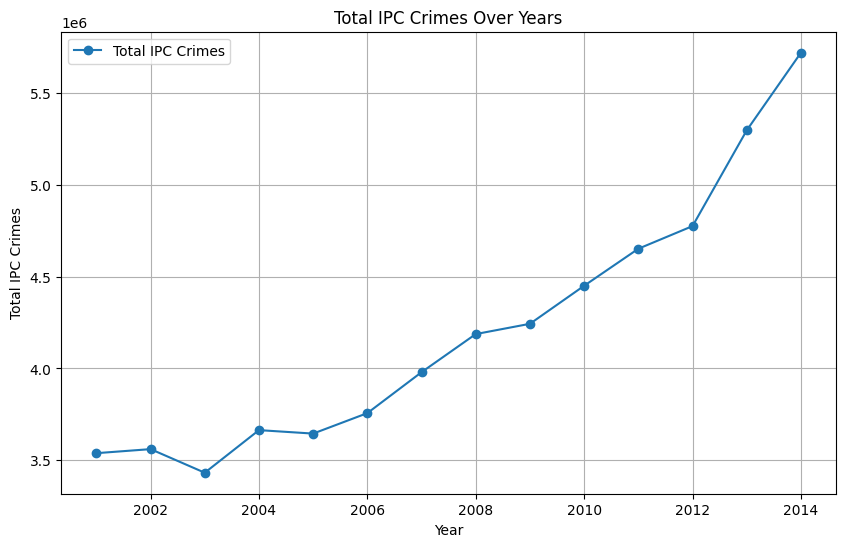

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(
    yearly_crime["year"],
    yearly_crime["total_ipc_crimes"],
    marker='o'
)
plt.title("Total IPC Crimes Over Years")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.legend(["Total IPC Crimes"])
plt.grid(True)
plt.show()

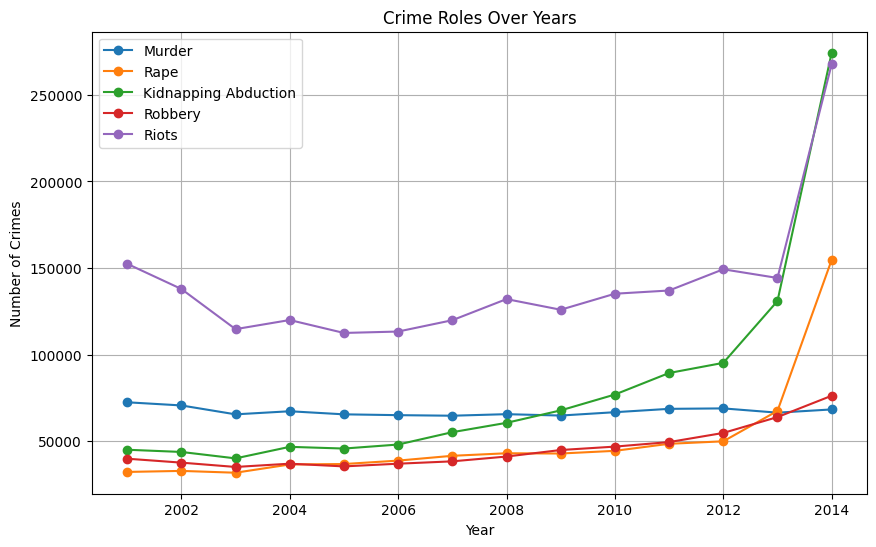

In [13]:
plt.figure(figsize=(10, 6))
crime_roles = [
    "murder",
    "rape",
    "kidnapping_abduction",
    "robbery",
    "riots",

]

for col in crime_roles:
    plt.plot(
        yearly_crime["year"],
        yearly_crime[col],
        marker='o',
        label=col.replace("_", " ").title()

    )
plt.title("Crime Roles Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
core_yearly = (
    core_ipc
    .groupby("year" , as_index=False)["total_ipc_crimes"].sum()
)

women_yearly = (
    women_crime
    .groupby("year" , as_index=False).sum(numeric_only=True)
    )
women_yearly["total_women_crimes"] = women_yearly.drop(
    columns = ["year"] , errors="ignore"
).sum(axis=1)
women_yearly = women_yearly[["year", "total_women_crimes"]]

children_crimes = (
    children_crime
    .groupby("year", as_index=False)["total"]
    .sum()
    .rename(columns={"total": "total_children_crimes"})
)

compare = (
    core_yearly
    .merge(women_yearly, on="year" , how="inner")
    .merge(children_crimes , on="year" ,  how="inner")

)

compare.head()

,year,total_ipc_crimes,total_women_crimes,total_children_crimes
0,2001,3538616,261450,21035
1,2002,3560660,262224,20520
2,2003,3432240,262728,23266
3,2004,3664020,287230,28721
4,2005,3645204,287046,30096


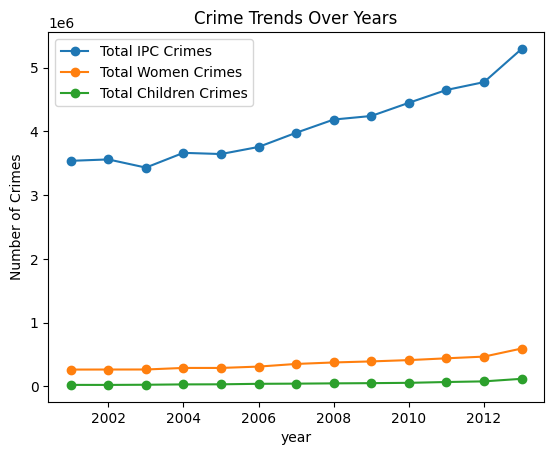

In [28]:
import matplotlib.pyplot as plt

plt.Figure(figsize=(10, 6))
plt.plot(compare["year"], compare["total_ipc_crimes"] ,label="Total IPC Crimes", marker="o")
plt.plot(compare["year"], compare["total_women_crimes"], label="Total Women Crimes", marker="o")
plt.plot(compare["year"], compare["total_children_crimes"], label="Total Children Crimes", marker="o")

plt.title("Crime Trends Over Years")
plt.xlabel("year")
plt.ylabel("Number of Crimes")
plt.legend()
plt.show()

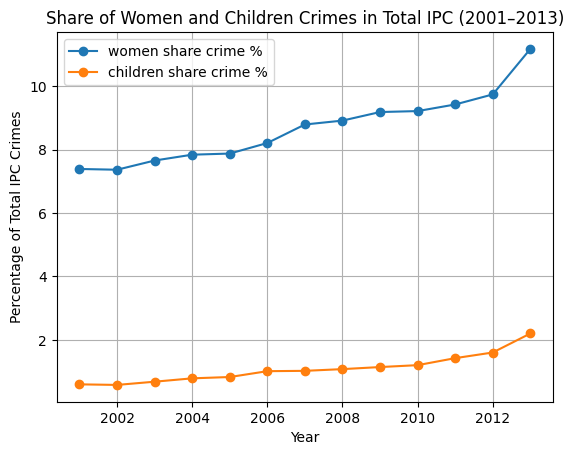

In [19]:
compare["women_share_pact"] = (
    compare["total_women_crimes"] / compare["total_ipc_crimes"] * 100
)

compare["children_share_pact"] = (
    compare["total_children_crimes"] / compare["total_ipc_crimes"] * 100
)

plt.Figure(figsize=(10, 6))
plt.plot(compare["year"], compare["women_share_pact"] , label="women share crime %" , marker="o")
plt.plot(compare["year"], compare["children_share_pact"] , label="children share crime %" , marker="o")

plt.title("Share of Women and Children Crimes in Total IPC (2001–2013)")
plt.xlabel("Year")
plt.ylabel("Percentage of Total IPC Crimes")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
state_Core = (
    core_ipc
    .groupby(["state_ut"] , as_index=False)["total_ipc_crimes"].sum()
    .sort_values(by="total_ipc_crimes", ascending=False)

)
state_Core.head(10)

,state_ut,total_ipc_crimes
38,MADHYA PRADESH,4827540
39,MAHARASHTRA,4546872
60,TAMIL NADU,4120352
2,ANDHRA PRADESH,4037962
65,UTTAR PRADESH,3716148
56,RAJASTHAN,3711832
32,KARNATAKA,2962126
33,KERALA,2874918
21,GUJARAT,2771550
8,BIHAR,2692586


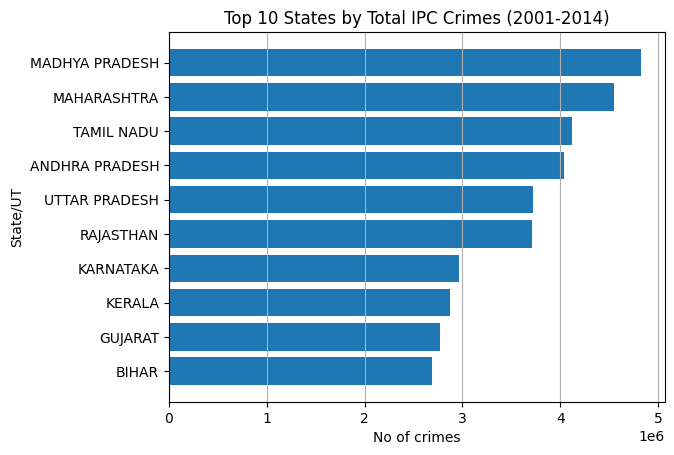

In [21]:

import matplotlib.pyplot as plt

top10core = (
    state_Core.head(10)
)

plt.Figure(figsize=(12, 6))
plt.barh(
    top10core["state_ut"],
    top10core["total_ipc_crimes"],
    
)

plt.gca().invert_yaxis()
plt.title("Top 10 States by Total IPC Crimes (2001-2014)")
plt.xlabel("No of crimes")
plt.ylabel("State/UT")
plt.grid(axis="x"
         )
plt.show()

In [22]:
state_women = (
    women_crime
    .groupby("state_ut", as_index=False)
    .sum(numeric_only=True)
)

state_women["total_women_crimes"] = state_women.drop(
    columns=["state_ut"], errors="ignore"
).sum(axis=1)

state_women = state_women.sort_values(
    by="total_women_crimes",
    ascending=False
)

state_women.head(10)


,state_ut,year,rape,kidnapping_abduction,dowry_deaths,assault_on_women,insult_to_modesty_of_women,cruelty_by_husband_or_relatives,importation_of_girls,total_women_crimes
65,UTTAR PRADESH,1761768,38116,95180,47648,59396,53022,155234,6,2210370
38,MADHYA PRADESH,1260147,72174,18486,18072,159756,18634,79938,120,1627327
39,MAHARASHTRA,1107588,35972,21706,8498,78438,24220,160726,4,1437152
56,RAJASTHAN,911085,31596,49342,10132,61706,708,200202,12,1264783
8,BIHAR,1083510,26248,38778,27096,15152,452,51360,880,1243476
2,ANDHRA PRADESH,742469,26958,29872,12430,103998,72262,238014,34,1226037
60,TAMIL NADU,941080,13904,24872,4634,38658,20086,36376,30,1079640
69,WEST BENGAL,620034,41574,43546,10344,45742,3108,261336,228,1025912
50,ODISHA,862830,22860,16582,9110,59892,5878,37394,36,1014582
21,GUJARAT,770547,8498,25836,1004,17996,2730,118862,0,945473


In [23]:
state_children = (
    children_crime
    .groupby("state_ut", as_index=False)["total"]
    .sum()
    .rename(columns={"total": "total_children_crimes"})
    .sort_values(by="total_children_crimes", ascending=False)
)

state_children.head(10)


,state_ut,total_children_crimes
38,MADHYA PRADESH,90770
64,UTTAR PRADESH,72004
39,MAHARASHTRA,62602
17,DELHI,50049
2,ANDHRA PRADESH,33158
11,CHHATTISGARH,26905
21,GUJARAT,22350
56,RAJASTHAN,22188
8,BIHAR,19726
66,Uttar Pradesh,19714


In [26]:
top_states = set(
    state_Core.head(10)["state_ut"]
).union(
    state_women.head(10)["state_ut"]
).union(
    state_children.head(10)["state_ut"]
)

comparison = (
    state_Core[state_Core["state_ut"].isin(top_states)]
    .merge(
        state_women[["state_ut", "total_women_crimes"]],
        on="state_ut",
        how="left"
    )
    .merge(
        state_children[["state_ut", "total_children_crimes"]],
        on="state_ut",
        how="left"
    )
)

comparison


,state_ut,total_ipc_crimes,total_women_crimes,total_children_crimes
0,MADHYA PRADESH,4827540,1627327,90770
1,MAHARASHTRA,4546872,1437152,62602
2,TAMIL NADU,4120352,1079640,11838
3,ANDHRA PRADESH,4037962,1226037,33158
4,UTTAR PRADESH,3716148,2210370,72004
5,RAJASTHAN,3711832,1264783,22188
6,KARNATAKA,2962126,936724,7068
7,KERALA,2874918,648575,13882
8,GUJARAT,2771550,945473,22350
9,BIHAR,2692586,1243476,19726


In [29]:
ts = compare.set_index("year")["total_ipc_crimes"]
ts.head()

year
2001    3538616
2002    3560660
2003    3432240
2004    3664020
2005    3645204
Name: total_ipc_crimes, dtype: int64

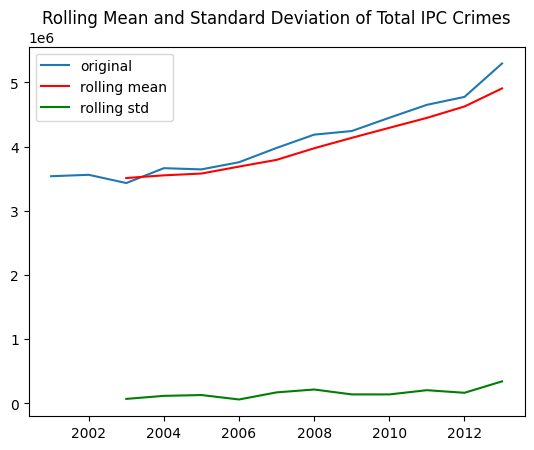

In [30]:
import matplotlib.pyplot as plt

rolling_mean = ts.rolling(window=3).mean()
rolling_std = ts.rolling(window=3).std()

plt.Figure(figsize=(10, 6))
plt.plot(ts , label="original")
plt.plot(rolling_mean , color="red" , label="rolling mean")
plt.plot(rolling_std , color="green" , label="rolling std")
plt.legend()
plt.title("Rolling Mean and Standard Deviation of Total IPC Crimes")
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller 
result = adfuller(ts)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key , value in result[4].items():
    print(f"{key}: {value}")

ADF Statistic: 2.218253427797937
p-value: 0.9988971912058884
Critical Values:
1%: -4.137829282407408
5%: -3.1549724074074077
10%: -2.7144769444444443


In [33]:
diff_ts = ts.diff().dropna()

diff_ts.head()

year
2002     22044.0
2003   -128420.0
2004    231780.0
2005    -18816.0
2006    111382.0
Name: total_ipc_crimes, dtype: float64

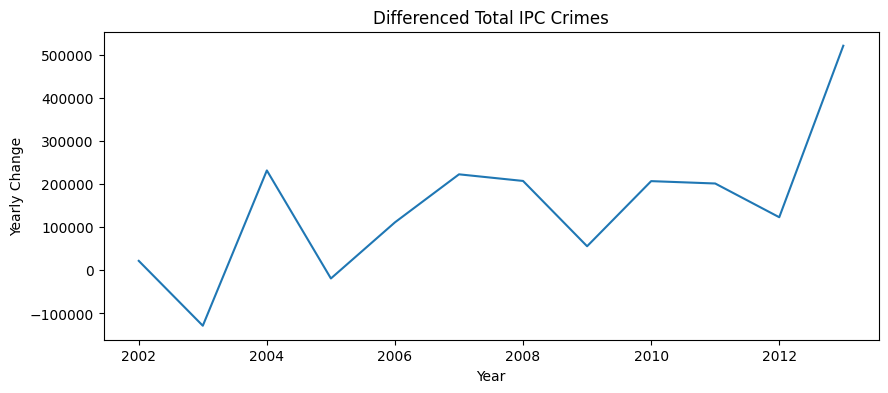

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(diff_ts)
plt.title("Differenced Total IPC Crimes")
plt.xlabel("Year")
plt.ylabel("Yearly Change")
plt.show()


In [35]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(diff_ts)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -2.27249502105431
p-value: 0.18099235536180092
Critical Values:
   1%: -4.223238279489106
   5%: -3.189368925619835
   10%: -2.729839421487603


In [36]:
diff2ts = diff_ts.diff().dropna()
diff2ts.head()

year
2003   -150464.0
2004    360200.0
2005   -250596.0
2006    130198.0
2007    111378.0
Name: total_ipc_crimes, dtype: float64

In [37]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(diff2ts)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -4.293564065521842
p-value: 0.0004557510495114106
Critical Values:
   1%: -4.473135048010974
   5%: -3.28988060356653
   10%: -2.7723823456790124


<Figure size 1200x600 with 0 Axes>

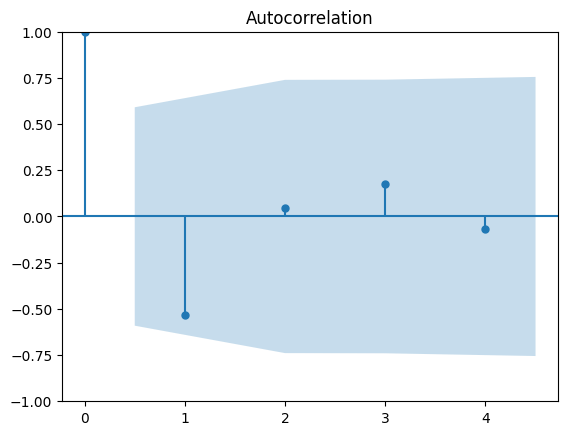

<Figure size 1200x600 with 0 Axes>

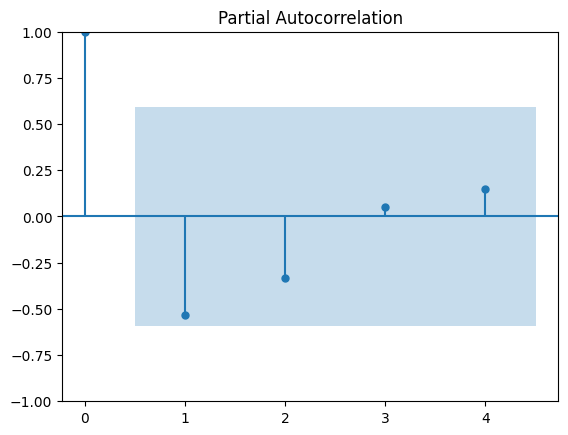

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(diff2ts, lags=4)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(diff2ts, lags=4)
plt.show()

In [42]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts , order=(1,2,1))
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:       total_ipc_crimes   No. Observations:                   13
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -147.633
Date:                Thu, 22 Jan 2026   AIC                            301.266
Time:                        15:08:33   BIC                            302.460
Sample:                             0   HQIC                           300.514
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7029      0.252     -2.792      0.005      -1.196      -0.209
ma.L1          0.7520      0.232      3.235      0.001       0.296       1.208
sigma2      2.775e+10   6.12e-12   4.53e+21      0.0

d:\projectsFX\Crime Pattern Analysis and Trend Forecasting System Using Public Data\crime\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\projectsFX\Crime Pattern Analysis and Trend Forecasting System Using Public Data\crime\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\projectsFX\Crime Pattern Analysis and Trend Forecasting System Using Public Data\crime\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported cla

In [44]:
yearly_df = compare.copy()
yearly_df["year"] = pd.to_datetime(yearly_df["year"], format="%Y")
yearly_df = yearly_df.set_index("year")
yearly_df = yearly_df.asfreq("YS")
yearly_df

,total_ipc_crimes,total_women_crimes,total_children_crimes,women_share_pact,children_share_pact
year,,,,,
2001-01-01,3538616,261450,21035,7.388482,0.594441
2002-01-01,3560660,262224,20520,7.364477,0.576298
2003-01-01,3432240,262728,23266,7.654709,0.677866
2004-01-01,3664020,287230,28721,7.839204,0.783866
2005-01-01,3645204,287046,30096,7.874621,0.825633
2006-01-01,3756586,308316,37934,8.207346,1.009800
2007-01-01,3979346,349842,40607,8.791445,1.020444
2008-01-01,4186758,373232,45000,8.914583,1.074817
2009-01-01,4242690,389670,48362,9.184503,1.139890


In [45]:
from statsmodels.tsa.arima.model import ARIMA

ts = yearly_df["total_ipc_crimes"]

model = ARIMA(ts, order=(1,2,1))
result = model.fit()


In [51]:
forecast = result.get_forecast(steps=15)
forecast_df = forecast.summary_frame()
print(forecast_df)

total_ipc_crimes          mean       mean_se  mean_ci_lower  mean_ci_upper
2014-01-01        5.843010e+06  1.665716e+05   5.516536e+06   6.169485e+06
2015-01-01        6.371952e+06  3.798105e+05   5.627537e+06   7.116367e+06
2016-01-01        6.913985e+06  6.361639e+05   5.667126e+06   8.160843e+06
2017-01-01        7.446816e+06  9.336661e+05   5.616864e+06   9.276768e+06
2018-01-01        7.986115e+06  1.265057e+06   5.506648e+06   1.046558e+07
2019-01-01        8.520868e+06  1.628698e+06   5.328678e+06   1.171306e+07
2020-01-01        9.058816e+06  2.021025e+06   5.097680e+06   1.301995e+07
2021-01-01        9.594518e+06  2.440711e+06   4.810813e+06   1.437822e+07
2022-01-01        1.013180e+07  2.885676e+06   4.475977e+06   1.578762e+07
2023-01-01        1.066797e+07  3.354837e+06   4.092610e+06   1.724333e+07
2024-01-01        1.120492e+07  3.846827e+06   3.665279e+06   1.874456e+07
2025-01-01        1.174132e+07  4.360757e+06   3.194398e+06   2.028825e+07
2026-01-01        1.22781

In [52]:
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

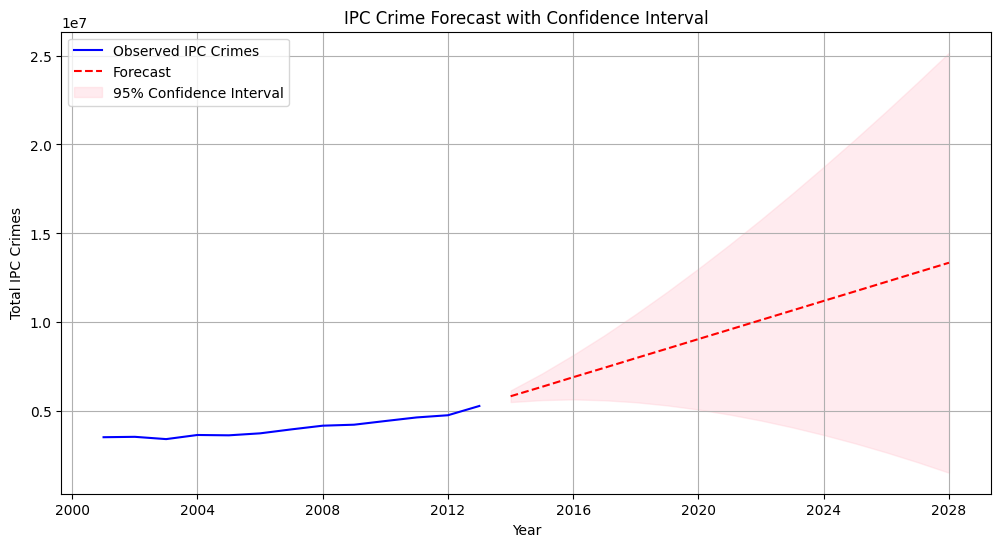

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 1️⃣ Historical data
plt.plot(ts.index, ts.values, label="Observed IPC Crimes", color="blue")

# 2️⃣ Forecast mean
plt.plot(forecast_mean.index, forecast_mean.values,
         label="Forecast", color="red", linestyle="--")

# 3️⃣ Confidence interval
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="pink",
    alpha=0.3,
    label="95% Confidence Interval"
)

plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.title("IPC Crime Forecast with Confidence Interval")
plt.legend()
plt.grid(True)

plt.show()


In [54]:
import pickle

with open("models/ipc_crime_arima_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [55]:
ws = compare.set_index("year")["total_women_crimes"]
ws.head(10)

year
2001    261450
2002    262224
2003    262728
2004    287230
2005    287046
2006    308316
2007    349842
2008    373232
2009    389670
2010    410018
Name: total_women_crimes, dtype: int64

In [59]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ws)
print("ADF stats", result[0])
print("p value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF stats 2.6556104691271187
p value: 0.9990833823398594
Critical Values:
   1%: -4.137829282407408
   5%: -3.1549724074074077
   10%: -2.7144769444444443


In [60]:
diffws = ws.diff().dropna()
diffws.head()

year
2002      774.0
2003      504.0
2004    24502.0
2005     -184.0
2006    21270.0
Name: total_women_crimes, dtype: float64

In [61]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(diffws)
print("ADF stats", result[0])
print("p value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF stats -0.37997015436661147
p value: 0.9133897124546608
Critical Values:
   1%: -4.223238279489106
   5%: -3.189368925619835
   10%: -2.729839421487603


In [62]:
diff2ws = diffws.diff().dropna()
diff2ws.head()

year
2003     -270.0
2004    23998.0
2005   -24686.0
2006    21454.0
2007    20256.0
Name: total_women_crimes, dtype: float64

In [63]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(diff2ws)
print("ADF stats", result[0])
print("p value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF stats -2.2017863320177296
p value: 0.20559776033504185
Critical Values:
   1%: -4.331573
   5%: -3.23295
   10%: -2.7487


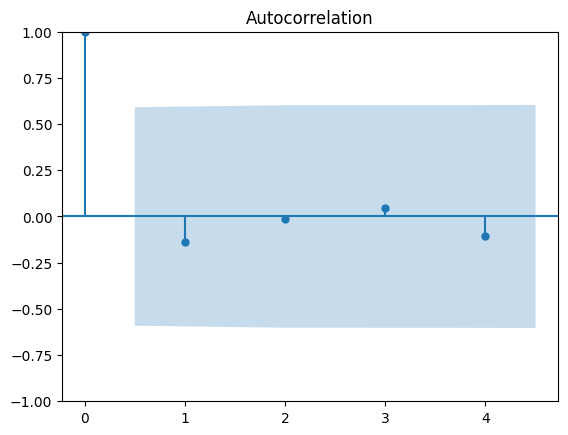

<Figure size 1200x600 with 0 Axes>

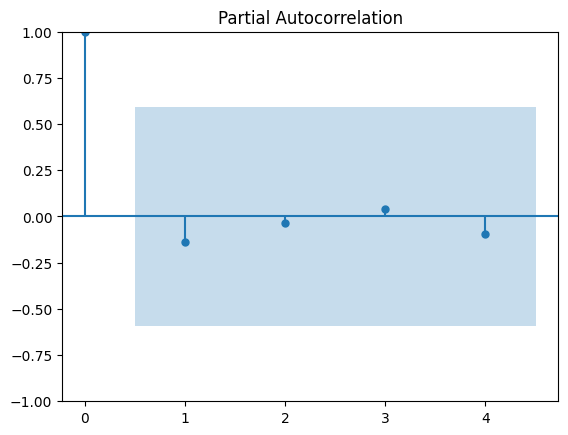

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.Figure(figsize=(12, 6))
plot_acf(diff2ws , lags=4)
plt.show()

plt.figure(figsize=(12 ,6))
plot_pacf(diff2ws , lags=4)
plt.show()

In [68]:
yearly_df = compare.copy()
yearly_df["year"] = pd.to_datetime(yearly_df["year"], format="%Y")
yearly_df = yearly_df.set_index("year")
yearly_df = yearly_df.asfreq("YS")

from statsmodels.tsa.arima.model import ARIMA

# Use the properly indexed series from yearly_df
ws = yearly_df["total_women_crimes"]

model = ARIMA(ws, order=(1,2,1))
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:     total_women_crimes   No. Observations:                   13
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -130.435
Date:                Thu, 22 Jan 2026   AIC                            266.871
Time:                        15:35:21   BIC                            268.065
Sample:                    01-01-2001   HQIC                           266.118
                         - 01-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6368      2.535     -0.251      0.802      -5.605       4.332
ma.L1          0.6710      2.363      0.284      0.776      -3.961       5.303
sigma2      1.568e+09   1.07e-08   1.47e+17      0.0

In [69]:
forecastws = result.get_forecast(steps=15)
forecast_dfwomen = forecastws.summary_frame()
print(forecast_dfwomen)

total_women_crimes          mean       mean_se  mean_ci_lower  mean_ci_upper
2014-01-01          7.222326e+05  3.960285e+04  644612.399453   7.998527e+05
2015-01-01          8.503139e+05  8.976585e+04  674376.068551   1.026252e+06
2016-01-01          9.798977e+05  1.503817e+05  685154.944014   1.274640e+06
2017-01-01          1.108525e+06  2.205226e+05  676308.240106   1.540741e+06
2018-01-01          1.237761e+06  2.987763e+05  652170.158940   1.823352e+06
2019-01-01          1.366609e+06  3.845523e+05  612900.567708   2.120318e+06
2020-01-01          1.495705e+06  4.771507e+05  560506.514363   2.430903e+06
2021-01-01          1.624643e+06  5.761618e+05  495386.252819   2.753899e+06
2022-01-01          1.753681e+06  6.811625e+05  418626.847841   3.088735e+06
2023-01-01          1.882655e+06  7.918507e+05  330656.406927   3.434654e+06
2024-01-01          2.011670e+06  9.079364e+05  232147.732345   3.791193e+06
2025-01-01          2.140659e+06  1.029188e+06  123488.952262   4.157830e+06

In [70]:
forecast_dfws_mean = forecastws.predicted_mean
forecast_dfws_ci = forecastws.conf_int()

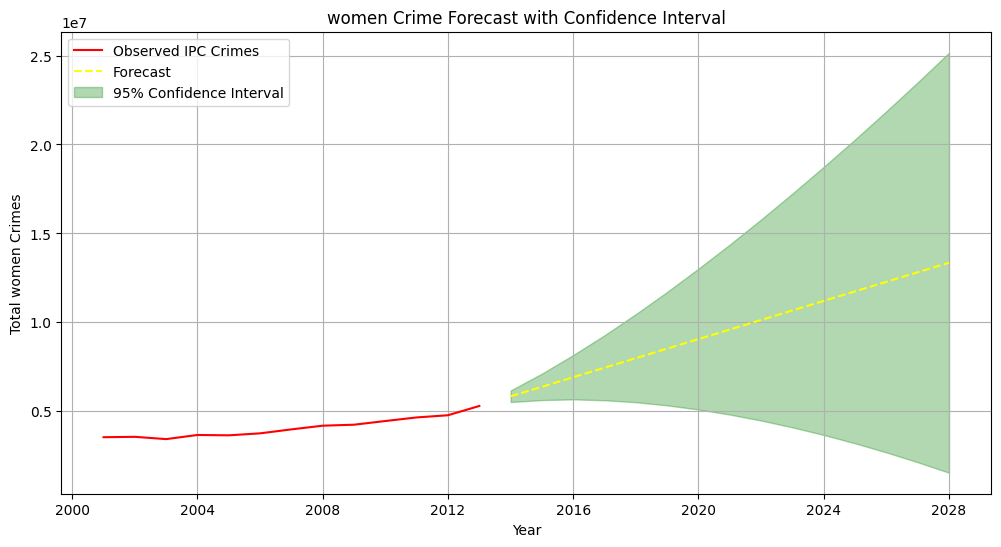

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 1️⃣ Historical data
plt.plot(ws.index, ts.values, label="Observed IPC Crimes", color="red")

# 2️⃣ Forecast mean
plt.plot(forecast_mean.index, forecast_mean.values,
         label="Forecast", color="yellow", linestyle="--")

# 3️⃣ Confidence interval
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="green",
    alpha=0.3,
    label="95% Confidence Interval"
)

plt.xlabel("Year")
plt.ylabel("Total women Crimes")
plt.title("women Crime Forecast with Confidence Interval")
plt.legend()
plt.grid(True)

plt.show()


In [73]:
import pickle

with open("models/women_crime_arima_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [75]:
# Children Crime Time Series Analysis
cs = yearly_df["total_children_crimes"]
cs.head()

year
2001-01-01    21035
2002-01-01    20520
2003-01-01    23266
2004-01-01    28721
2005-01-01    30096
Freq: YS-JAN, Name: total_children_crimes, dtype: int64

In [76]:
# ADF Test for Children Crimes
from statsmodels.tsa.stattools import adfuller
result = adfuller(cs)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: 1.0681563250989403
p-value: 0.9949354737463434
Critical Values:
   1%: -4.6651863281249994
   5%: -3.3671868750000002
   10%: -2.802960625


In [77]:
# First Differencing
diffcs = cs.diff().dropna()
diffcs.head()

year
2002-01-01    -515.0
2003-01-01    2746.0
2004-01-01    5455.0
2005-01-01    1375.0
2006-01-01    7838.0
Freq: YS-JAN, Name: total_children_crimes, dtype: float64

In [81]:
# ADF Test after First Differencing
from statsmodels.tsa.stattools import adfuller
result = adfuller(diffcs)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: 3.327803758951597
p-value: 1.0
Critical Values:
   1%: -4.473135048010974
   5%: -3.28988060356653
   10%: -2.7723823456790124


<Figure size 1200x600 with 0 Axes>

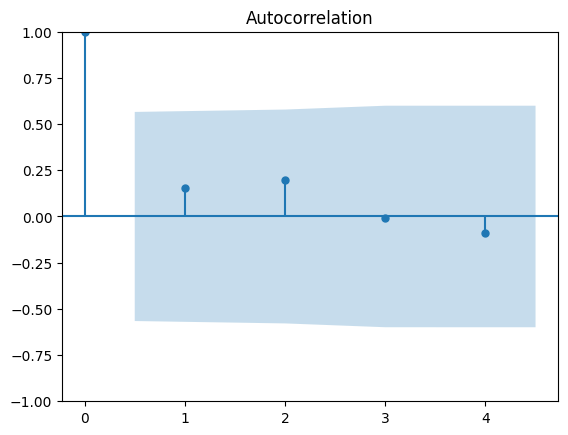

<Figure size 1200x600 with 0 Axes>

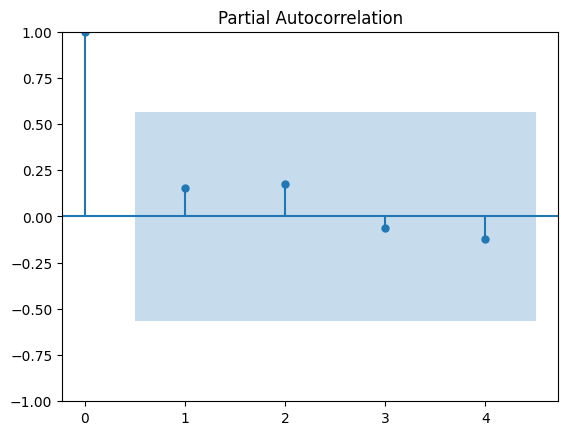

In [83]:
# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(diffcs, lags=4)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(diffcs, lags=4)
plt.show()

In [84]:
# Fit ARIMA Model for Children Crimes
from statsmodels.tsa.arima.model import ARIMA

model_children = ARIMA(cs, order=(1, 1, 1))
result_children = model_children.fit()

print(result_children.summary())

d:\projectsFX\Crime Pattern Analysis and Trend Forecasting System Using Public Data\crime\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                 SARIMAX Results                                 
Dep. Variable:     total_children_crimes   No. Observations:                   13
Model:                    ARIMA(1, 1, 1)   Log Likelihood                -128.546
Date:                   Thu, 22 Jan 2026   AIC                            263.092
Time:                           15:53:06   BIC                            264.547
Sample:                       01-01-2001   HQIC                           262.554
                            - 01-01-2013                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8968      0.794      1.129      0.259      -0.660       2.454
ma.L1         -0.4660      1.836     -0.254      0.800      -4.065       3.133
sigma2      9.662e+07   7.09

In [85]:
# Generate Forecast
forecast_children = result_children.get_forecast(steps=15)
forecast_df_children = forecast_children.summary_frame()
print(forecast_df_children)

total_children_crimes           mean        mean_se  mean_ci_lower  \
2014-01-01             137336.610064    9829.430382  118071.280526   
2015-01-01             156070.473791   17159.082577  122439.289932   
2016-01-01             172871.862159   24769.444855  124324.642325   
2017-01-01             187940.117976   32648.521184  123950.192306   
2018-01-01             201454.021019   40713.955528  121656.134515   
2019-01-01             213573.909189   48889.014999  117753.200552   
2020-01-01             224443.580876   57111.309830  112507.470500   
2021-01-01             234192.001068   65331.865502  106143.897642   
2022-01-01             242934.831485   73512.768979   98852.451882   
2023-01-01             250775.802863   81624.942212   90793.855888   
2024-01-01             257807.945682   89646.308038   82104.410581   
2025-01-01             264114.693948   97560.333474   72899.954019   
2026-01-01             269770.875102  105354.882531   63279.099747   
2027-01-01          

In [86]:
# Extract forecast components
forecast_children_mean = forecast_children.predicted_mean
forecast_children_ci = forecast_children.conf_int()

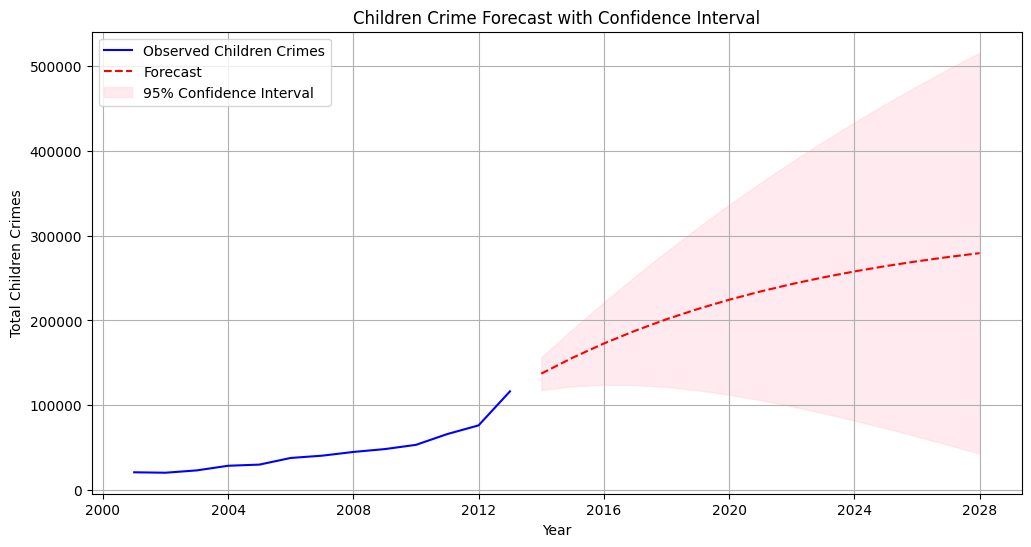

In [87]:
# Plot Forecast with Confidence Interval
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Historical data
plt.plot(cs.index, cs.values, label="Observed Children Crimes", color="blue")

# Forecast mean
plt.plot(forecast_children_mean.index, forecast_children_mean.values,
         label="Forecast", color="red", linestyle="--")

# Confidence interval
plt.fill_between(
    forecast_children_ci.index,
    forecast_children_ci.iloc[:, 0],
    forecast_children_ci.iloc[:, 1],
    color="pink",
    alpha=0.3,
    label="95% Confidence Interval"
)

plt.xlabel("Year")
plt.ylabel("Total Children Crimes")
plt.title("Children Crime Forecast with Confidence Interval")
plt.legend()
plt.grid(True)

plt.show()

In [88]:
# Save the model
import pickle

with open("models/children_crime_arima_model.pkl", "wb") as f:
    pickle.dump(model_children, f)